In [3]:
# Recommendations for Stakeholder

In [1]:
# --- EDA Project December 2025 - Data Science & AI Bootcamp - by Helge Linnert ---

# library imports
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# project imports
from src.ccleaning import clean_data

# configurations - needed? 
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
#pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
# read data, clean it and print
df = pd.read_csv("data/eda_project.csv")
df = clean_data(df)
df.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
0,7129300520,3,1.00,1180.00,5650.00,1.00,0,0.00,3,7,...,0.00,1955,0,98178,47.51,-122.26,1340.00,5650.00,2014-10-13,221900.00
1,6414100192,3,2.25,2570.00,7242.00,2.00,0,0.00,3,7,...,400.00,1951,19910,98125,47.72,-122.32,1690.00,7639.00,2014-12-09,538000.00
2,5631500400,2,1.00,770.00,10000.00,1.00,0,0.00,3,6,...,0.00,1933,0,98028,47.74,-122.23,2720.00,8062.00,2015-02-25,180000.00
3,2487200875,4,3.00,1960.00,5000.00,1.00,0,0.00,5,7,...,910.00,1965,0,98136,47.52,-122.39,1360.00,5000.00,2014-12-09,604000.00
4,1954400510,3,2.00,1680.00,8080.00,1.00,0,0.00,3,8,...,0.00,1987,0,98074,47.62,-122.05,1800.00,7503.00,2015-02-18,510000.00


In [ ]:
# Questions:
# 1. When is a good time to sell in the next 18 months? 
# 2. Should I renovate this house I have built in 1970?
# 3. Where can I get the highest profits?

# Hypotheses:
# 1. A good time to sell is in March.
# 2. Renovating a house built in 1970 will increase the price per square foot.
# 3. Highest profits can be gained from renovating old houses built between 1900-1930.

# ---
# Recommendations
# Re sales time: good time to sell is in April
# Re renovation Y/N: 
# Re high profits  


# TBD:
# historical houses
# best neighborhoods

#dates: 
# min 2014-05-02, max 2015-05-27
# count 372

In [17]:
# -- 
#pps
df['pps_living'] = (df['price']/df['sqft_living'])


# -- create bins for months
bins = list(range(1900, 2030, 10))
labels = [
    '1900s','10s','20s','30s',
    '40s','50s','60s','70s',
    '80s','90s','2000s','2010s'
]

df['yr_build_decade'] = pd.cut(
    df['yr_built'],
    bins=bins,
    labels=labels,
    right=False    
)

# -- arrays of zip codes and set location type based on zip code
# Some zipcodes pertain to more than one city/region. Here: only unique zipcodes are used
# Source: https://www.ciclt.net/sn/clt/capitolimpact/gw_ziplist.aspx

seattle_only_zip = [98101, 98102, 98103, 98104, 98105, 98106, 98107, 98109, 98111,
                98112, 98114, 98115, 98116, 98117,98118, 98119, 98121, 98122,
                98124, 98125, 98126, 98131, 98132, 98134, 98136, 98144, 98145,
                98154,98160, 98161, 98164, 98171, 98174, 98199
                ]

bellevue_only_zip = [98004, 98005, 98006, 98007, 98008, 98009, 98015
                    ]

kent_only_zip = [98030, 98031, 98032, 98035, 98042, 98064
                ]

renton_only_zip = [98055, 98056, 98057, 98058, 98059
                  ]

federalway_only_zip = [98001, 98003, 98023, 98063, 98093
                      ]


# king county without Seattle
kc_wo_seattle = [
                98001, 98002, 98003, 98004, 98005, 98006, 98007, 98008, 98009,
                98010, 98011, 98013, 98014, 98015, 98019, 98022, 98023, 98024,
                98025, 98027, 98028, 98029, 98030, 98031, 98032, 98033, 98034,
                98035, 98038, 98039, 98040, 98041, 98042, 98045, 98047, 98050,
                98051, 98052, 98053, 98054, 98055, 98056, 98057, 98058, 98059,
                98062, 98063, 98064, 98065, 98068, 98070, 98071, 98072, 98073,
                98074, 98075, 98083, 98092, 98093, 98108, 98133, 98138, 98146,
                98148, 98155, 98158, 98166, 98168, 98177, 98178, 98188, 98198,
                98224, 98288, 98077
                ]

# zipcodes of places with population < 100K
kc_wo_cities = [98002, 98010, 98011, 98013, 98014, 98019, 98022, 98024, 98025,
                98027, 98028, 98029, 98033, 98034, 98038, 98039, 98040, 98041, 
                98045, 98047, 98050, 98051, 98052, 98053, 98054, 98062, 98065, 
                98068, 98070, 98071, 98072, 98073, 98074, 98075, 98083, 98092, 
                98224, 98288
               ]

# king county zipcodes including seattle (not used here)
kc_total_zip = [98001, 98002, 98003, 98004, 98005, 98006, 98007, 98008, 98009, 
                98010, 98011, 98013, 98014, 98015, 98019, 98022, 98023, 98024, 
                98025, 98027, 98028, 98029, 98030, 98031, 98032, 98033, 98034, 
                98035, 98038, 98039, 98040, 98041, 98042, 98045, 98047, 98050, 
                98051, 98052, 98053, 98054, 98055, 98056, 98057, 98058, 98059, 
                98062, 98063, 98064, 98065, 98068, 98070, 98071, 98072, 98073, 
                98074, 98075, 98083, 98092, 98093, 98101, 98102, 98103, 98104, 
                98105, 98106, 98107, 98108, 98109, 98111, 98112, 98114, 98115, 
                98116, 98117, 98118, 98119, 98121, 98122, 98124, 98125, 98126, 
                98131, 98132, 98133, 98134, 98136, 98138, 98144, 98145, 98146, 
                98148, 98154, 98155, 98158, 98160, 98161, 98164, 98166, 98168, 
                98171, 98174, 98177, 98178, 98188, 98198, 98199, 98224, 98288
                ]


# assign values based on zipcode lists
# nested np.where method works because zipcode lists are mutually exclusive
df['location_type'] = np.where(
    df['zipcode'].isin(seattle_only_zip),
    'Seattle',
    np.where( 
        df['zipcode'].isin(bellevue_only_zip),
        'Bellevue',
        np.where(
            df['zipcode'].isin(kent_only_zip),
            'Kent',
            np.where(
                df['zipcode'].isin(renton_only_zip),
                'Renton',
                np.where(
                    df['zipcode'].isin(federalway_only_zip),
                    'Federal Way',
                    np.where(
                        df['zipcode'].isin(kc_wo_seattle),
                        'King County without Cities',
                        'Outside King County' 
                    )
                )
            )
        )
    )
)


# order location_type as list
location_order = df.groupby('location_type')['pps_living'].mean().sort_values(ascending=False).index



In [41]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               21597 non-null  int64         
 1   bedrooms         21597 non-null  int64         
 2   bathrooms        21597 non-null  float64       
 3   sqft_living      21597 non-null  float64       
 4   sqft_lot         21597 non-null  float64       
 5   floors           21597 non-null  float64       
 6   waterfront       21597 non-null  int64         
 7   view             21534 non-null  float64       
 8   condition        21597 non-null  int64         
 9   grade            21597 non-null  int64         
 10  sqft_above       21597 non-null  float64       
 11  sqft_basement    21145 non-null  float64       
 12  yr_built         21597 non-null  int64         
 13  yr_renovated     21597 non-null  int64         
 14  zipcode          21597 non-null  int64

In [51]:
# -- re Hypothesis 1

df_months = df[['date', 'price']].copy()
df_months['month'] = df['date'].dt.month
df_months.head()



,date,price,month
0,2014-10-13,221900.00,10
1,2014-12-09,538000.00,12
2,2015-02-25,180000.00,2
3,2014-12-09,604000.00,12
4,2015-02-18,510000.00,2


In [104]:
#df groupby month: look at price and pps_living
#aggregate the following columns
monthly_prices = df.groupby(df_months['month'])[['price', 'pps_living']].agg(
                    avg_price = ('price', 'mean'),
                    #median_price = ('price', 'median'),
                    #avg_pps = ('pps_living', 'mean'),
                    #row_count = ('price', 'count')
                    )

monthly_prices

,avg_price
month,
1,525963.25
2,508520.05
3,544057.68
4,562215.62
5,550849.75
6,557534.32
7,544892.16
8,536655.21
9,529723.52


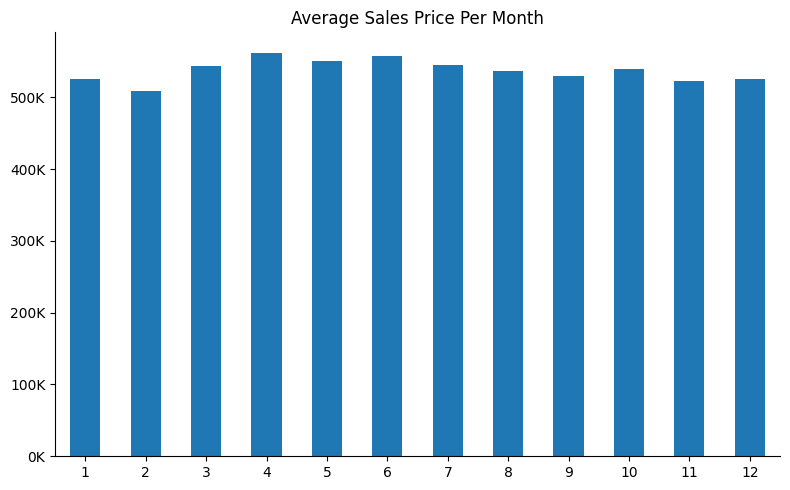

In [121]:
# -- re Hypothesis 1

ax = monthly_prices.plot(kind='bar')

ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# remove frame / outer box
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.get_legend().remove()

# remove text
ax.set_ylabel("")
ax.set_xlabel("")
ax.set_title("Average Sales Price Per Month")

# format y-axis labels
formatter = FuncFormatter(lambda x, pos: f"{int(x/1000)}K")
ax.yaxis.set_major_formatter(formatter)

# save & show plot
plt.tight_layout()
plt.savefig('plots/avg_price_per_month.png')
plt.show()


In [ ]:
# re hypothesis 2 see notebook EDA.ipynb / plot hypothesis 1

In [11]:
# re Hypothesis 3
# -- historical houses 1900-1949

historical_check = (
    df[df['yr_build_decade'].isin(labels)]
      .groupby('yr_build_decade')['pps_living']
      .agg(['count', 'mean', 'median', 'std', 'min', 'max'])
)
print(historical_check)


                 count   mean  median    std   min    max
yr_build_decade                                          
1900s              645 361.16  350.54 127.70 91.84 791.67
10s                805 338.10  333.33 127.56 90.75 778.44
20s               1192 347.98  337.51 122.32 99.21 773.33
30s                530 322.84  314.79 128.65 89.29 798.12
40s               1763 303.48  287.50 122.79 88.00 810.14
50s               2450 276.48  253.62 118.36 87.65 792.68
60s               2658 235.18  214.65  96.95 87.59 776.89
70s               2285 230.09  218.91  84.00 88.15 762.46
80s               2281 237.21  231.30  83.35 88.70 761.01
90s               2232 226.72  215.80  81.98 97.04 790.82
2000s             3515 252.97  238.11  96.10 87.71 800.00
2010s             1241 253.08  233.85  97.86 99.96 786.59


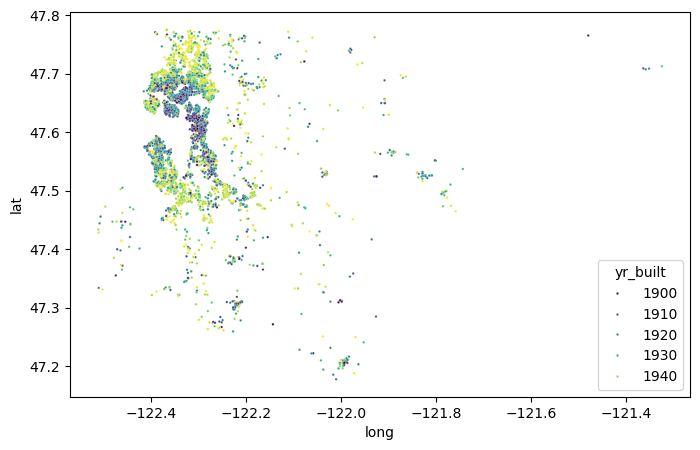

In [27]:
df_sub = df[(df['yr_built'] < 1950) & (df['location_type']=='Seattle')]



sns.scatterplot(
            data=df[df['yr_built'] < 1950],
            x='long',
            y='lat',
            hue='yr_built',
            s=3,
            palette='viridis'
)

plt.savefig('plots/old_house_distribution.png')
plt.show()